In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = np.loadtxt(open("data.csv", "rb"), delimiter=",", skiprows=1)

In [4]:
x = data[:,0]
p = data[:,1]
h = data[:,2]
n_samples = len(x)

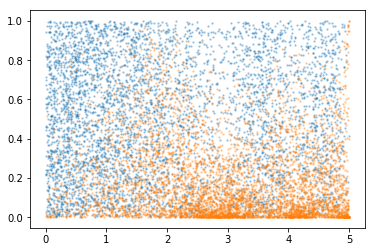

In [5]:
plt.figure()
plt.scatter(x[h==0], p[h==0], 2, alpha = 0.3)
plt.scatter(x[h==1], p[h==1], 2, alpha = 0.3)

In [225]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim

In [226]:
network = nn.Sequential(
        nn.Linear(1,10),
        nn.LeakyReLU(0.1),
        nn.Linear(10,10),
        nn.LeakyReLU(0.1),
        nn.Linear(10,10),
        nn.LeakyReLU(0.1),
        nn.Linear(10,10),
        nn.LeakyReLU(0.1),
        nn.Linear(10,10),
        nn.LeakyReLU(0.1),
        nn.Linear(10,1),
        nn.Sigmoid()
)

soft_compare = nn.Sigmoid()

In [227]:
optimizer = optim.Adagrad(network.parameters(), lr = 0.01)

In [228]:
loss_hist = []
batch_size = 10000
target = Variable(torch.from_numpy(np.ones(x.shape).astype(np.float32) * BH(p)[1]))
l1loss = nn.L1Loss()
for iteration in range(1000):
    if iteration % 100 == 0:
        print iteration
    #choice = np.random.choice(n_samples, batch_size)
    choice = range(n_samples)
    x_input = Variable(torch.from_numpy(x[choice].astype(np.float32).reshape(batch_size,1)))
    
    optimizer.zero_grad()
    output = network.forward(x_input) * 0.1
    

    loss = l1loss(output, target)
    loss.backward()
    
    optimizer.step()
    loss_hist.append(loss.data[0])

0
100
200
300
400
500
600
700
800
900


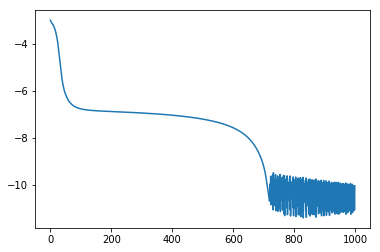

In [229]:
plt.plot(np.log(loss_hist))

In [230]:
loss_hist = []
batch_size = 10000
for iteration in range(1000):
    if iteration % 100 == 0:
        print iteration
    #choice = np.random.choice(n_samples, batch_size)
    choice = range(n_samples)
    x_input = Variable(torch.from_numpy(x[choice].astype(np.float32).reshape(batch_size,1)))
    p_input = Variable(torch.from_numpy(p[choice].astype(np.float32).reshape(batch_size,1)))
     
    optimizer.zero_grad()
    output = network.forward(x_input) * 0.1
    s = torch.sum(soft_compare((output - p_input) * 1e3)) / batch_size
    s2 = torch.sum(soft_compare((p_input - (1-output)) * 1e3)) / batch_size
    
    gain = s  - 2 * soft_compare((s2 - s*0.05) * 1e2) 
    
    loss = -gain
    loss.backward(retain_variables=True)
    
    optimizer.step()
    loss_hist.append(loss.data[0])

0
100
200
300
400
500
600
700
800
900


In [231]:
bins = np.arange(0,5,0.5)
nbins = len(bins)
bin_choice1, bin_choice2 = np.random.choice(nbins-1, 2)

bin1_choice = (x < bins[bin_choice1 + 1]) * (x > bins[bin_choice1])
bin2_choice = (x < bins[bin_choice2 + 1]) * (x > bins[bin_choice2])

x_input1 = Variable(torch.from_numpy(x[bin1_choice].astype(np.float32).reshape(sum(bin1_choice),1)))
p_input1 = Variable(torch.from_numpy(p[bin1_choice].astype(np.float32).reshape(sum(bin1_choice),1)))

output1 = network.forward(x_input1) * 0.02

x_input2 = Variable(torch.from_numpy(x[bin2_choice].astype(np.float32).reshape(sum(bin2_choice),1)))
p_input2 = Variable(torch.from_numpy(p[bin2_choice].astype(np.float32).reshape(sum(bin2_choice),1)))

output2 = network.forward(x_input2) * 0.02


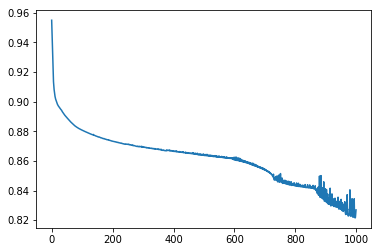

In [232]:
plt.plot(loss_hist)

In [233]:
s

Variable containing:
1.00000e-02 *
  9.0006
[torch.FloatTensor of size 1]

In [234]:
s2/s

Variable containing:
1.00000e-02 *
  3.1503
[torch.FloatTensor of size 1]

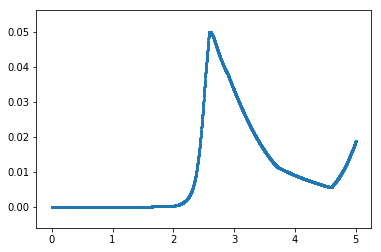

In [235]:
plt.scatter(x[choice], output.data.numpy(), 2)

In [236]:
x_input = Variable(torch.from_numpy(x.astype(np.float32).reshape(n_samples ,1)))
p_input = Variable(torch.from_numpy(p.astype(np.float32).reshape(n_samples ,1)))

output = network.forward(x_input) * 0.3
pred = (p_input < output).data.numpy()
pred = pred[:,0].astype(np.float32)

In [237]:
np.sum(pred * h) / np.sum(pred)

0.94693877551020411

In [238]:
np.sum(pred)

1225.0

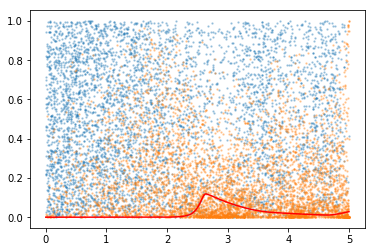

In [239]:
plt.figure()
plt.scatter(x[h==0], p[h==0], 2, alpha = 0.3)
plt.scatter(x[h==1], p[h==1], 2, alpha = 0.3)
#plt.scatter(x[choice], output.data.numpy(), 2)
x_input = Variable(torch.from_numpy(np.linspace(start = 0, stop = 5, num = n_samples).astype(np.float32).reshape(n_samples ,1)))
output = network.forward(x_input) * 0.3

plt.plot(x_input.data.numpy(), output.data.numpy(), 'r')


In [240]:
def BH(x, alpha = 0.05):
    x_s = sorted(x)
    n = len(x_s)
    ic = 0
    for i in range(n):
        if x_s[i] < i*alpha/float(n):
            ic = i
    return ic, x_s[ic]

In [241]:
BH(p)

(294, 0.0014594187926900001)